In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [33]:
abs_path_header = "/Users/Hersh/Programming/basis_net_data"
# kf_results_dir = "Jan_04_1608"
# kf_results_dir = "Jan_04_1630"
# ig_results_dir = "Jan_04_1615"
# --- Jan 8 results ---
# Fast!
ig_results_dir = "Jan_08_1738"
kf_results_dir = "Jan_08_1734"

# slow XYZ
# ig_results_dir = "Jan_08_1751"
# kf_results_dir = "Jan_08_1745"

kf_dict = np.load(os.path.join(abs_path_header, kf_results_dir, "data.npz"), allow_pickle=True)  # ['arr_0'].item()
ig_dict = np.load(os.path.join(abs_path_header, ig_results_dir, "data.npz"), allow_pickle=True)  # ['arr_0'].item()
print(list(kf_dict.keys()))


['actual_costs', 'expected_costs', 'actual_scaled_metrics', 'expected_scaled_metrics', 'expected_variances', 'tried_gains', 'histories']


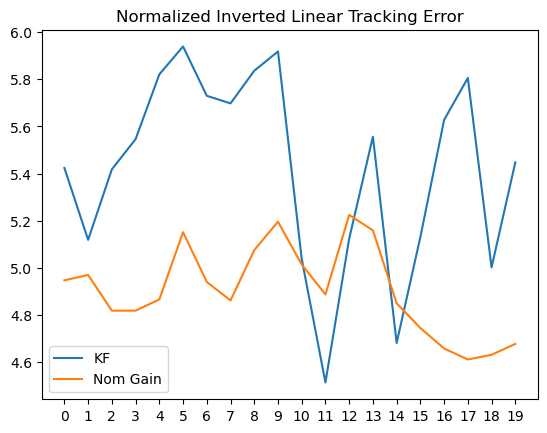

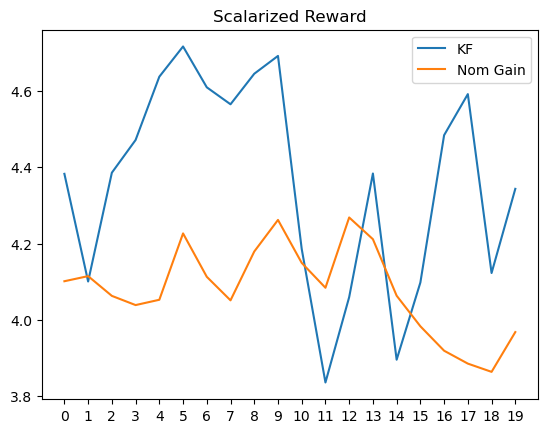

In [34]:
plt.figure()
plt.title("Normalized Inverted Linear Tracking Error")
plt.plot(kf_dict["actual_scaled_metrics"][:,0])
plt.plot(ig_dict["actual_scaled_metrics"][:,0])
plt.legend(["KF", "Nom Gain"])
plt.xticks([i for i in range(20)])
plt.figure()
plt.title("Scalarized Reward")
plt.xticks([i for i in range(20)])
plt.plot(kf_dict["actual_costs"])
plt.plot(ig_dict["actual_costs"])
plt.legend(["KF", "Nom Gain"])


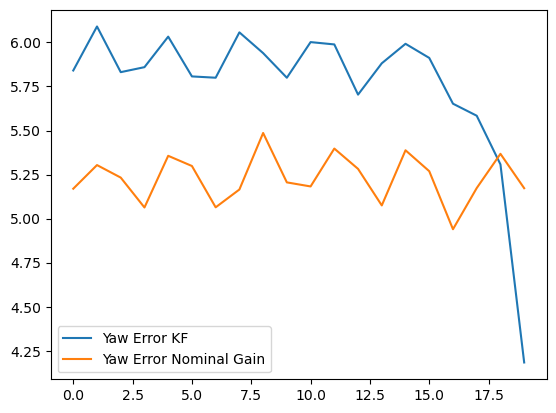

In [15]:
plt.figure()
# plt.plot(kf_dict["actual_scaled_metrics"][:,0])
plt.plot(kf_dict["actual_scaled_metrics"][:,0])
# plt.plot(kf_dict["actual_scaled_metrics"][:,2])
# plt.plot(kf_dict["actual_scaled_metrics"][:,3])
# plt.legend(["tracking error pos", "tracking error yaw", "pitchroll", "cmd thrust"])

# plt.plot(ig_dict["actual_scaled_metrics"][:,0])
plt.plot(ig_dict["actual_scaled_metrics"][:,0])
# plt.plot(ig_dict["actual_scaled_metrics"][:,2])
# plt.plot(ig_dict["actual_scaled_metrics"][:,3])
plt.legend(["Yaw Error KF", "Yaw Error Nominal Gain"])
# plt.legend(["tracking error pos", "tracking error yaw", "pitchroll", "cmd thrust"])


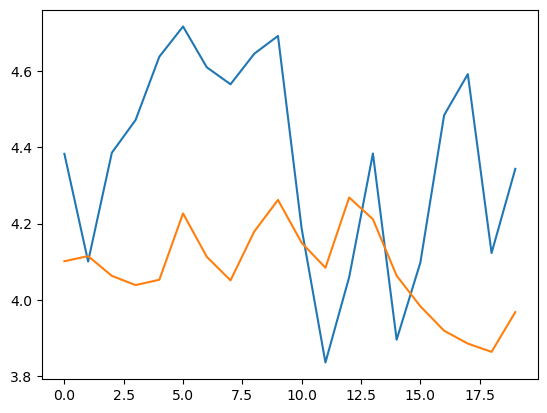

In [10]:
# exclude yaw since it's doing weird things?
test_cost_weights = np.array([0.6, 0.0, 0.1, 0.3])
plt.figure()
plt.plot([np.dot(test_cost_weights, r) for r in kf_dict["actual_scaled_metrics"]])
plt.plot([np.dot(test_cost_weights, r) for r in ig_dict["actual_scaled_metrics"]])


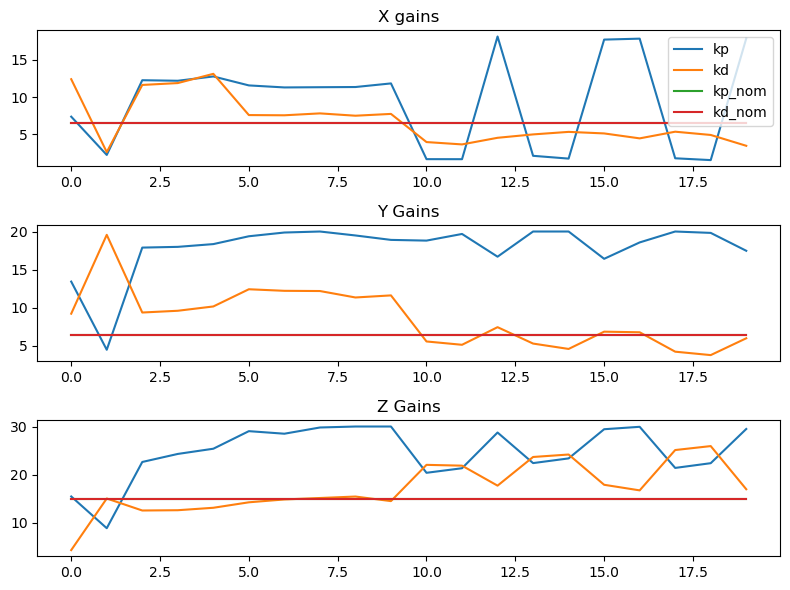

In [35]:
initial_gain = [6.5, 6.5, 15, 6.5, 6.5, 15, 544, 46.64]
fig, ax = plt.subplots(3, 1, figsize=(8, 6))
ax[0].plot(kf_dict["tried_gains"][:,0])
ax[0].plot(kf_dict["tried_gains"][:,3])
ax[0].plot([initial_gain[0] for _ in range(20)])
ax[0].plot([initial_gain[3] for _ in range(20)])
ax[0].legend(["kp", "kd", "kp_nom", "kd_nom"])
ax[0].set_title("X gains")

ax[1].plot(kf_dict["tried_gains"][:,1])
ax[1].plot(kf_dict["tried_gains"][:,4])
ax[1].plot([initial_gain[1] for _ in range(20)])
ax[1].plot([initial_gain[4] for _ in range(20)])
ax[1].set_title("Y Gains")

ax[2].plot(kf_dict["tried_gains"][:,2])
ax[2].plot(kf_dict["tried_gains"][:,5])
ax[2].plot([initial_gain[2] for _ in range(20)])
ax[2].plot([initial_gain[5] for _ in range(20)])
ax[2].set_title("Z Gains")
fig.tight_layout()
